In [1]:
! pip show PyTDC

Name: PyTDC
Version: 0.3.8
Summary: Therapeutics Data Commons
Home-page: https://github.com/mims-harvard/TDC
Author: TDC Team
Author-email: kexinhuang@hsph.harvard.edu
License: MIT
Location: /home/nipasuma/miniconda3/envs/tdc/lib/python3.7/site-packages
Requires: fuzzywuzzy, numpy, pandas, rdkit-pypi, requests, scikit-learn, seaborn, tqdm
Required-by: 


In [2]:
RANDOM_SEED = 42

In [3]:
import pandas as pd

from tdc import utils as tdc_utils
from tdc.single_pred import Tox

from DeepPurpose import utils as dp_utils, CompoundPred

In [4]:
X, y = Tox(name = 'herg_central', label_name="hERG_inhib").get_data(format = 'DeepPurpose')

Found local copy...
Loading...
Done!


In [5]:
X, y = X[:100], y[:100]

In [6]:
pd.Series(y).value_counts()

0    95
1     5
dtype: int64

In [7]:
hparams = {
    "drug_encoding": "MPNN",
    "lr": 0.001,
    "batch_size": 128,
    "mpnn_hidden_size": 32,
    "mpnn_depth": 2,
    "train_epochs": 3,
}

In [8]:
%%time

train, val, test = dp_utils.data_process(X_drug=X, y = y, drug_encoding=hparams["drug_encoding"], 
                                      random_seed=RANDOM_SEED)

Drug Property Prediction Mode...
in total: 100 drugs
encoding drug...
unique drugs: 100
Done.
CPU times: user 2.01 s, sys: 21.8 ms, total: 2.03 s
Wall time: 474 ms


In [9]:
config = dp_utils.generate_config(
    drug_encoding=hparams["drug_encoding"], 
    train_epoch=hparams['train_epochs'], 
    LR=hparams['lr'], 
    batch_size=hparams['batch_size'],
    mpnn_hidden_size=hparams['mpnn_hidden_size'],
    mpnn_depth=hparams['mpnn_depth']
)

In [10]:
model = CompoundPred.model_initialize(**config)

Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.70894. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.22222 , AUPRC: 0.125 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.47704. Total time 0.0 hours
Validation at Epoch 2 , AUROC: 0.88888 , AUPRC: 0.5 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.15246. Total time 0.0 hours
Validation at Epoch 3 , AUROC: 0.11111 , AUPRC: 0.11111 , F1: 0.0
--- Go for Testing ---
Testing AUROC: 0.7450980392156863 , AUPRC: 0.3055555555555555 , F1: 0.0
--- Training Finished ---


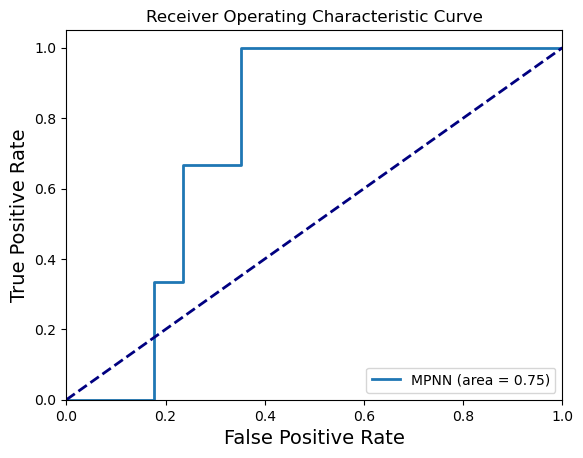

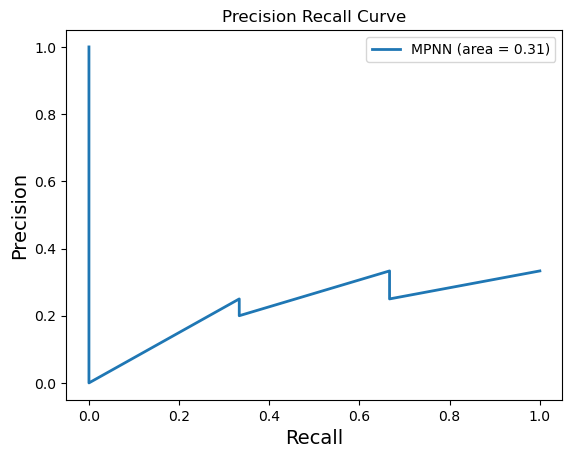

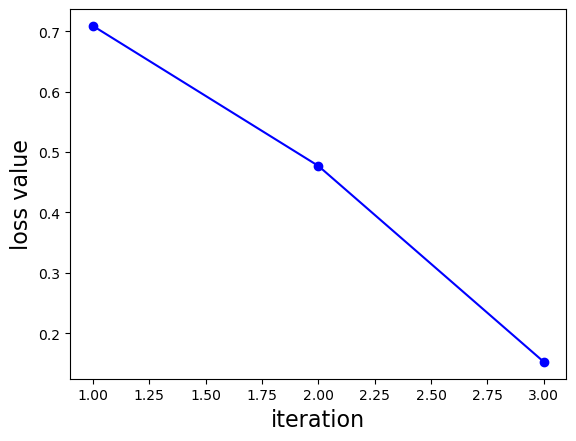

In [11]:
model.train(train, val, test)

In [12]:
model.save_model('./tutorial_model')